## Import Datasets

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#load flight data
flights = pd.read_csv("C:/Users/Joyce/Desktop/Emory MSBA/Managing Big Data/Final Project/Flights_original/flights.csv",low_memory=False)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#load airline data
airlines = pd.read_csv("C:/Users/Joyce/Desktop/Emory MSBA/Managing Big Data/Final Project/Flights_original/airlines.csv")
airlines.head()

,IATA_CODE,AIRLINE_NAME
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [3]:
#load airport_origin data
airports_origin = pd.read_csv("C:/Users/Joyce/Desktop/Emory MSBA/Managing Big Data/Final Project/Flights_original/airports-origin.csv")
airports_origin.head()

,IATA_CODE_ORIGIN,AIRPORT_ORIGIN_NAME,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
#load airport_destination data
airports_destination = pd.read_csv("C:/Users/Joyce/Desktop/Emory MSBA/Managing Big Data/Final Project/Flights_original/airports_dest.csv")
airports_destination.head()

,IATA_CODE_DESTINATION,AIRPORT_DESTINATION_NAME,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


## Summary Statistics of Data 

In [5]:
#data type of flights data
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [6]:
#data type of airlines data
airlines.dtypes

IATA_CODE       object
AIRLINE_NAME    object
dtype: object

In [7]:
#data type of airports data
airports_origin.dtypes

IATA_CODE_ORIGIN        object
AIRPORT_ORIGIN_NAME     object
ORIGIN_CITY             object
ORIGIN_STATE            object
ORIGIN_COUNTRY          object
ORIGIN_LATITUDE        float64
ORIGIN_LONGITUDE       float64
dtype: object

In [8]:
#check if there are NA values in flights data
#We will not drop the NA for now, because when we import the data in PySpark with defined schema, and when we query in the table
#Those NAs will be filtered
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [9]:
#summary table of Departure Delay in flights data
flights.DEPARTURE_DELAY.describe()

count    5.732926e+06
mean     9.370158e+00
std      3.708094e+01
min     -8.200000e+01
25%     -5.000000e+00
50%     -2.000000e+00
75%      7.000000e+00
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

In [10]:
#summary table of Departure Delay in flights data
flights.ARRIVAL_DELAY.describe()

count    5.714008e+06
mean     4.407057e+00
std      3.927130e+01
min     -8.700000e+01
25%     -1.300000e+01
50%     -5.000000e+00
75%      8.000000e+00
max      1.971000e+03
Name: ARRIVAL_DELAY, dtype: float64

* Below is a histogram of "DEPARTURE_DELAY" in the flights data, showing the distribution of flight's departure delay in minutes. We can see that most of the flighr's departure delay is less than one hour.

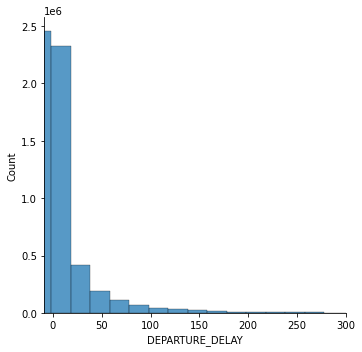

In [11]:
departure_hist = sns.displot(flights,x="DEPARTURE_DELAY",binwidth=20)
departure_hist.set(xlim=(-9,300))
#departure_hist.set(ylim=(0,800000))

* Below is a histogram of "ARRIVAL_DELAY" in the flights data, showing the distribution of flight's arrival delay in minutes. We can see that most of the flighr's arrival delay is less than one hour.

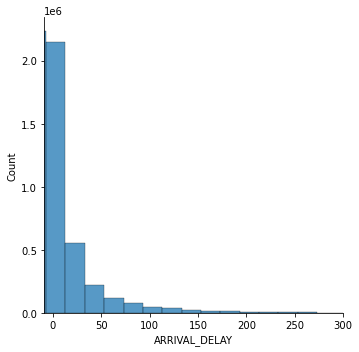

In [12]:
arrival_hist = sns.displot(flights,x="ARRIVAL_DELAY",binwidth=20)
arrival_hist.set(xlim=(-9,300))

* Below shows the frequecy of flights for from January to December, we can tell that around June and July, the number of flights are biggest.

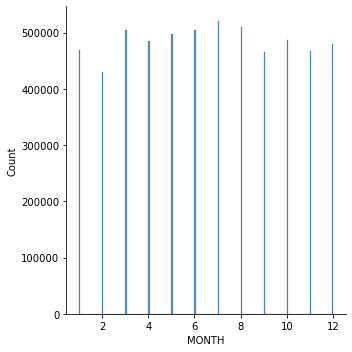

In [20]:
#frequency of the flights in each month
frequency_month = sns.displot(flights,x="MONTH")

* Below shows the frequecy of flights for day of the week, where 1 reprents Monday and so on. We can tell that Saturday has the lowest frequency of flights, while others days of the week's flight frequency are similar.

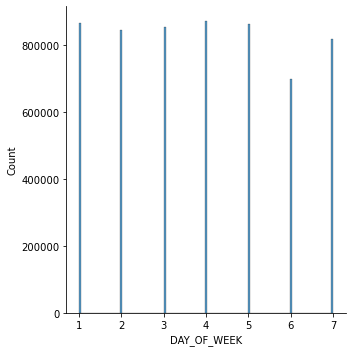

In [14]:
#frequency of the flights in each day
frequency_day = sns.displot(flights,x="DAY_OF_WEEK")

* This is a correlation matrix shows the correlation coefficients among each variable in the flights data, we can tell that there a very high correlation between departure delay and arrival delay with correlation coefficient 0.94. 

In [15]:
flights.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.020746,0.000207,-0.004085,-0.021994,-0.013117,-0.004946,...,-0.010121,-0.009133,-0.036793,-0.000991,-0.055043,-0.002214,0.007925,0.011262,0.004839,-0.008682
DAY,NaN,0.008874,1.000000,0.001111,0.001855,-0.001647,-0.002644,-0.000176,-0.002661,-0.003318,...,-0.003688,-0.004310,-0.003097,0.001981,-0.003537,-0.007375,-0.000510,0.006728,0.008869,0.008882
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,0.014461,0.008007,0.005607,-0.011510,-0.020639,0.004060,...,0.007092,0.005641,-0.017027,-0.001442,-0.022230,-0.023674,0.001576,0.011264,-0.018026,-0.006794
FLIGHT_NUMBER,NaN,-0.020746,0.001855,0.014461,1.000000,-0.005485,-0.001444,-0.008665,0.050369,0.005289,...,-0.013947,-0.002821,0.018419,0.003802,0.037895,-0.009235,-0.007994,0.007168,0.022274,-0.002836
SCHEDULED_DEPARTURE,NaN,0.000207,-0.001647,0.008007,-0.005485,1.000000,0.963791,0.110149,0.006581,0.938008,...,0.706237,0.629342,0.100220,-0.000752,0.011752,-0.075174,-0.005068,-0.089095,0.145054,-0.013470
DEPARTURE_TIME,NaN,-0.004085,-0.002644,0.005607,-0.001444,0.963791,1.000000,0.171723,0.014002,0.971971,...,0.710223,0.648265,0.159787,0.001425,0.008055,-0.043878,-0.004682,-0.024131,0.182374,-0.004221
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,-0.008665,0.110149,0.171723,1.000000,0.058515,0.162582,...,0.097566,0.049236,0.944672,0.022963,0.033099,0.095917,0.011877,0.621296,0.554802,0.243532
TAXI_OUT,NaN,-0.013117,-0.002661,-0.020639,0.050369,0.006581,0.014002,0.058515,1.000000,0.039104,...,0.024384,0.029745,0.227319,0.012251,0.005062,0.361659,-0.005988,-0.070290,-0.127824,0.063308
WHEELS_OFF,NaN,-0.004946,-0.003318,0.004060,0.005289,0.938008,0.971971,0.162582,0.039104,1.000000,...,0.721877,0.667991,0.155773,0.001667,0.004805,-0.026377,-0.006180,-0.032810,0.156089,-0.008338


### Now we will move on to PySpark using Spark SQL to drive insights from queries